# Modèle à deux couche 
Nous allons appliqué les calcules réalisé sur les modèle multicouche et les appliquer ici sur un modèle à deux couche pous se faire nous allons modifier les différentes fonctions composant notre neurone 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.animation import FuncAnimation
from sklearn.datasets import *
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

## Fonction d'initialisation modèle deux couche
Nous allons adapter la fonction d'initalisation pour un modèle deux couche car dans le neurone nous faision appel seulement à 1 parametre W et b ce qui n'est plus le cas dans le modèle deux couche

In [2]:
def initialisation(n0, n1, n2): #Correspond au dimension voir feuille de calcul
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)
    
    parametres = {
        "W1" : W1,
        "b1" : b1,
        "W2" : W2,
        "b2" : b2
    }
    
    return parametres 

## Forward-Propagation 
Nous allons modifier la fonction dite modèle en Forward-Propagation comme nous l'avons vu dans nos feuille de calcul

In [3]:
def forward_propagation(X, parametres):
    W1 = parametres["W1"]
    b1 = parametres["b1"]
    W2 = parametres["W2"]
    b2 = parametres["b2"]
    
    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    
    activations = {
        "A1" : A1,
        "A2" : A2
    }
    
    return activations

## Back-Propagation
Nous allons crée une fonctions qui calculeras nos gradients de la Back-propagation pour plus d'info voir feuille de calcule  

In [4]:
def back_propagation(X, y, activations, parametres):
    A1 = activations["A1"]
    A2 = activations["A2"]
    W2 = parametres["W2"]
    
    m = y.shape[1]
    
    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True) #Keepdims assure que db2 garde les dimension voulue 
    
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    
    gradients = {
        "dW1" : dW1,
        "db1" : db1,
        "dW2" : dW2,
        "db2" : db2
    }
    
    return gradients

## Fonctions update modèle deux couches
Nous allons mettre à jour la fonction update pour un modèle deux couche en implémentant tous nos calcule 

In [5]:
def update(gradients, parametres, learning_rate):
    W1 = parametres["W1"]
    b1 = parametres["b1"]
    W2 = parametres["W2"]
    b2 = parametres["b2"]
    
    dW1 = gradients["dW1"]
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    
    parametres = {
        "W1" : W1,
        "b1" : b1,
        "W2" : W2,
        "b2" : b2
    }
    
    return parametres

### Fonction prédicte
Nous allons réécrire la fonction prédict 

In [6]:
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    A2 = activations["A2"]
    return A2 >= 0.5

## Réseau de neurone à deux couches 
Nous allons écrire la fonction qui sera notre modèle à deux couche 

In [7]:
def neural_network(X_train, y_train, n1, learning_rate = 0.1, n_iter = 1000):
    # initialisation des paramètre
    n0 = X_train.shape[0]
    # n1 est le nombre de neurone de la première couche 
    # donc on laisse le choix de celui-ci dans les parametres
    n2 = y_train.shape[0]
    parametres = initialisation(n0, n1, n2)

    train_loss = []
    train_acc = []
    

    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X_train, parametres)
        gradients = back_propagation(X_train, y_train, activations, parametres)
        parametres = update(gradients, parametres, learning_rate)
        
        if i % 10 == 0:
            # Train
            train_loss.append(log_loss(y_train, activations["A2"]))
            y_pred = predict(X_train, parametres)
            train_acc.append(accuracy_score(y_train.flatten(), y_pred.flatten()))
            # nous utilisons flatten pour applatir notre tableau de 2 dimension en 1
            # Cela nous permet d'éviter d'éventuel problème
        
        


    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label="Train Loss")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label="Train acc")
    plt.legend()
    plt.show()

    return parametres

# Teste de notre modèle à deux couches
Nous allons tester l'efficacité de notre modèle en le confrontant à différent Datasets

## Dataset
Nous allons géner un dataset 

dimensions de X: (2, 100)
dimensions de y: (1, 100)


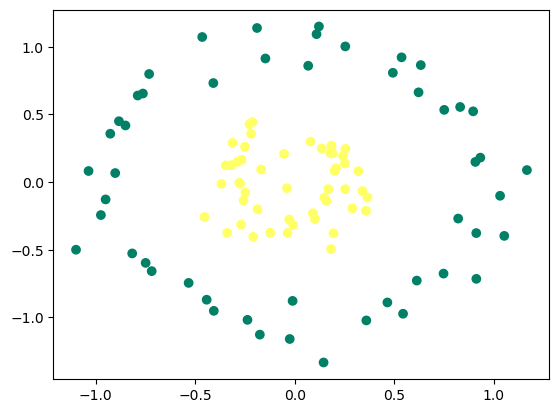

In [8]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 9644.94it/s]


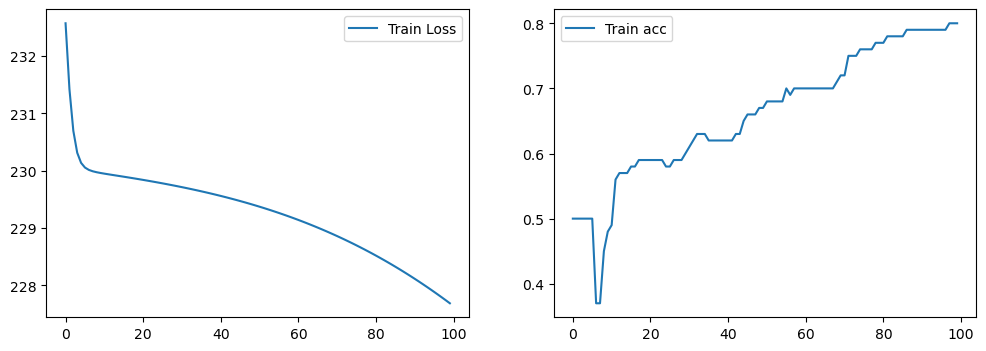

In [9]:
parametres = neural_network(X, y, n1=2, n_iter=1000, learning_rate=0.1)